In [34]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('../Data/updated_weather_dataset.csv')
display(df.head())

,City,DateTime,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,Madrid,2021-09-05 05:35,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,Sydney,2021-10-24 23:26,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,Moscow,2024-06-24 20:24,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,Berlin,2022-12-17 05:40,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,Rome,2020-07-05 18:24,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [36]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2500 non-null   object 
 1   DateTime     2500 non-null   object 
 2   Temperature  2500 non-null   float64
 3   Humidity     2500 non-null   float64
 4   Wind_Speed   2500 non-null   float64
 5   Cloud_Cover  2500 non-null   float64
 6   Pressure     2500 non-null   float64
 7   Rain         2500 non-null   object 
dtypes: float64(5), object(3)
memory usage: 156.4+ KB


None

In [37]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.581725,7.326996,10.001842,16.359398,22.536448,28.976476,34.995214
Humidity,2500.0,64.347094,19.954739,30.005071,47.339815,63.920797,81.561021,99.997481
Wind_Speed,2500.0,9.906255,5.780316,0.009819,4.761909,9.908572,14.948408,19.999132
Cloud_Cover,2500.0,49.658104,29.123104,0.015038,23.900016,49.488284,75.324140,99.997795
Pressure,2500.0,1014.312336,20.196433,980.014486,996.938630,1013.433035,1031.735067,1049.985593


In [38]:
df.isnull().sum()

City           0
DateTime       0
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [39]:
#Encoding categorical feature
df['Rain'] = df['Rain'].map({'no rain': 0, 'rain': 1})

#Converting DateTime from an object to a datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

#Getting all the numeric and categorical features
output_var = 'Rain'
numeric_data = df.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_data if col != output_var]
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numeric Features    : {numeric_features}')
print(f'Categorical Features: {categorical_features}')

Numeric Features    : ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
Categorical Features: ['City']


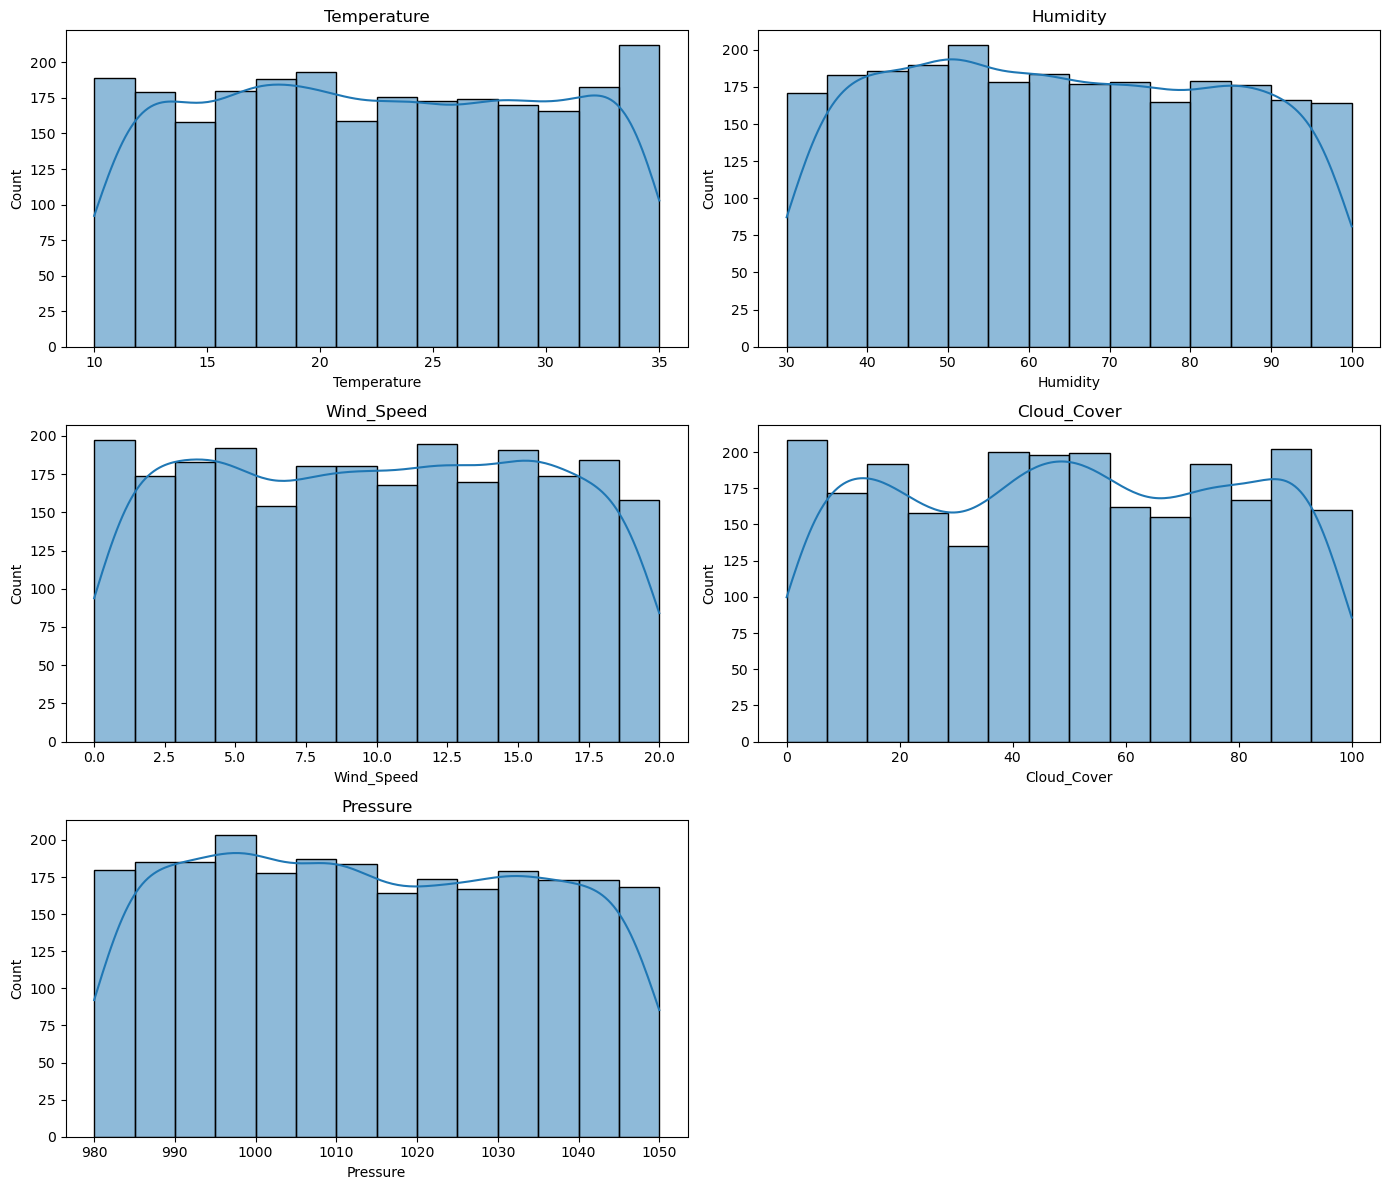

In [40]:
#Plotting raw numeric data
n_features = len(numeric_features)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))


plt.figure(figsize=(14, n_rows*4))
for i, col in enumerate(df[numeric_features].columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [41]:
#Data is relatively symmetrical (skewness ~ 0)
for col in numeric_features:
    skewness = skew(df[col])
    print(f"{col} skewness: {skewness:.2f}")

Temperature skewness: 0.01
Humidity skewness: 0.05
Wind_Speed skewness: 0.00
Cloud_Cover skewness: -0.01
Pressure skewness: 0.05


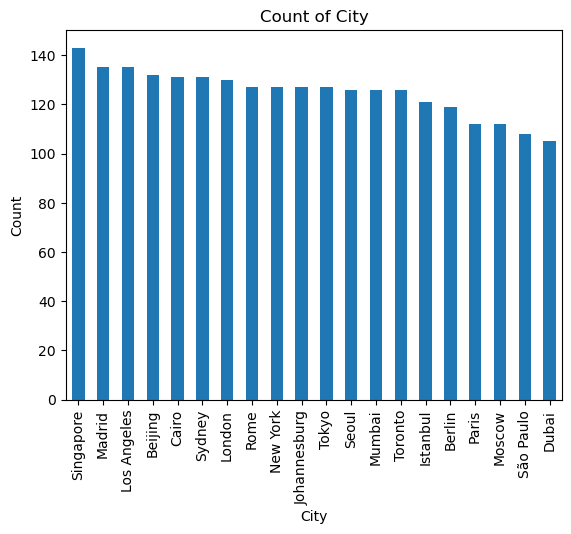

In [42]:

for col in categorical_features:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

C:\Users\user-pc\AppData\Local\Temp\ipykernel_11752\494513085.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M').size()


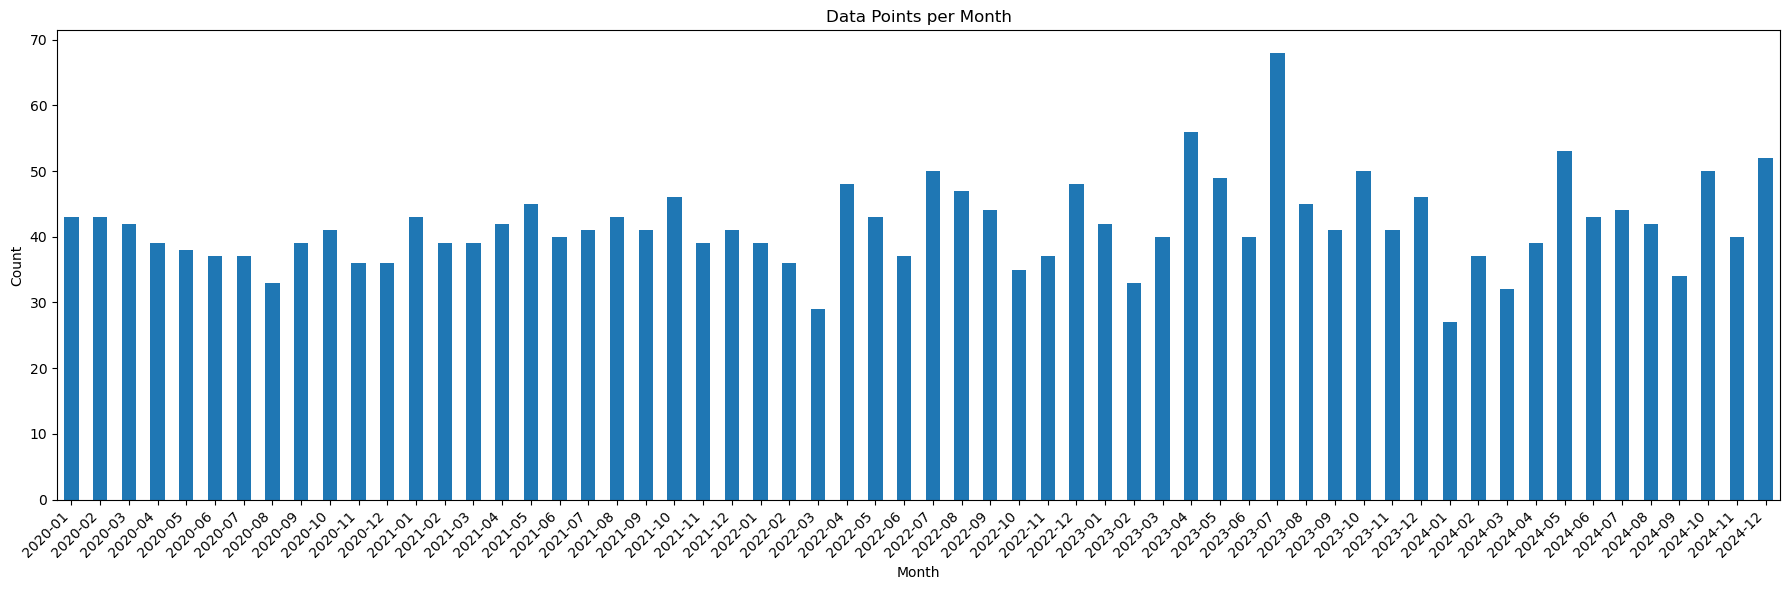

In [43]:
df.set_index('DateTime', inplace=True)

monthly_counts = df.resample('M').size()

plt.figure(figsize=(18, 6))

# Plot
monthly_counts.index = monthly_counts.index.strftime('%Y-%m')  
monthly_counts.plot(kind='bar')

# Titles and labels
plt.title('Data Points per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()
df.reset_index(inplace=True)

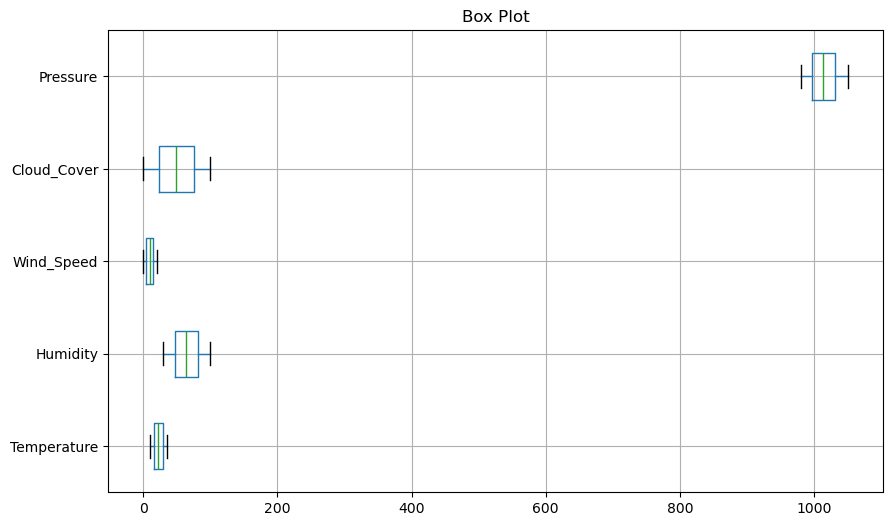

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[numeric_features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot')

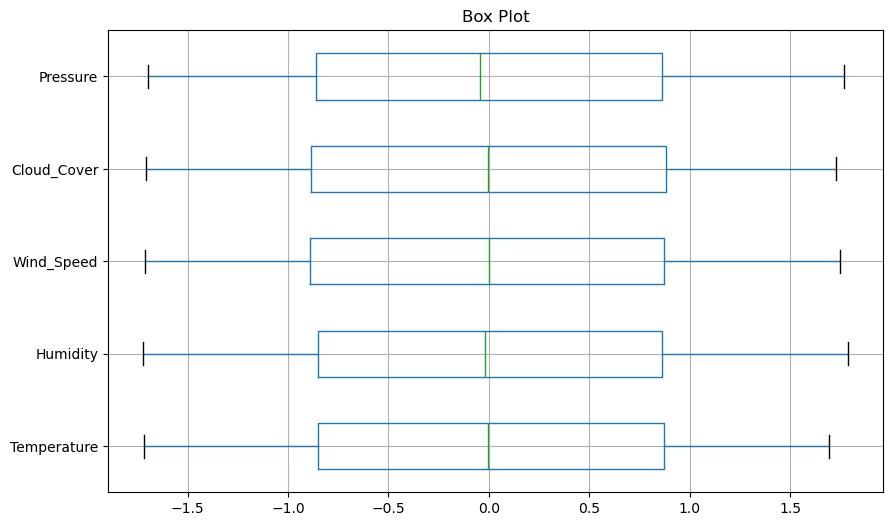

In [45]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_scaled[numeric_features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot')

In [46]:
#Outlier Removal
df_clean = df.copy()

# Loop through numeric features and apply IQR filtering
for col in numeric_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Data shape before outlier removal: {df.shape}")
print(f"Data shape after outlier removal: {df_clean.shape}")


Data shape before outlier removal: (2500, 8)
Data shape after outlier removal: (2500, 8)


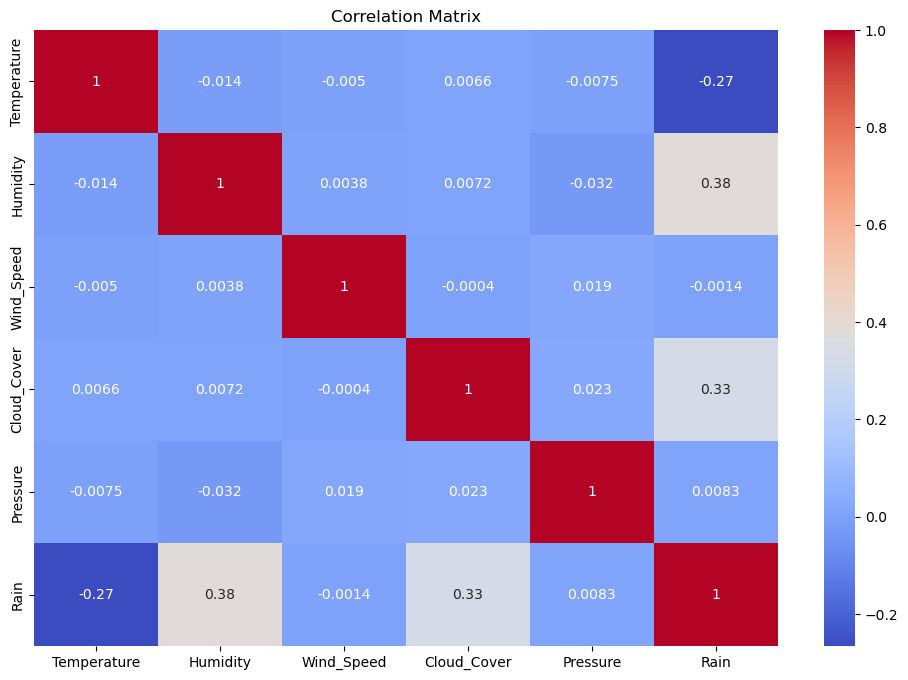

In [47]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

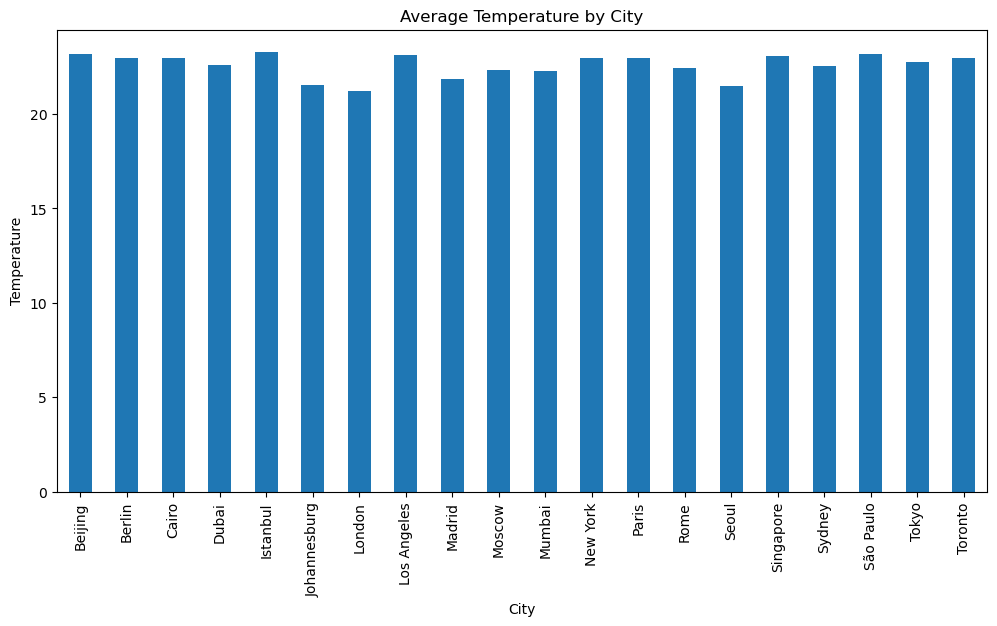

In [48]:
plt.figure(figsize=(12, 6))

df.groupby('City')['Temperature'].mean().plot(kind='bar')
plt.title('Average Temperature by City')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()

C:\Users\user-pc\AppData\Local\Temp\ipykernel_11752\645088458.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df['Temperature'].resample('M').mean()


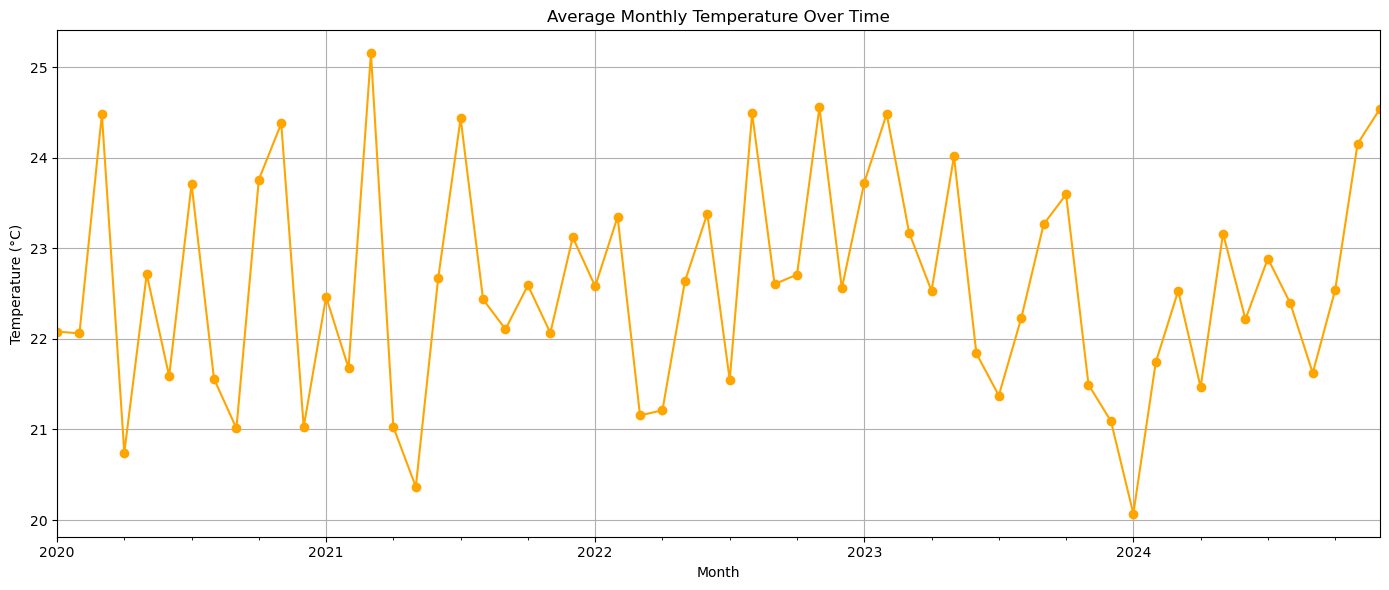

In [49]:
df.set_index('DateTime', inplace=True)
monthly_avg_temp = df['Temperature'].resample('M').mean()

# Plot
monthly_avg_temp.plot(figsize=(14, 6), color='orange', marker='o')
plt.title('Average Monthly Temperature Over Time')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
df.reset_index(inplace=True)
df_clean.to_csv('../Data/weather_cleaned.csv', index=False)